# color detection python using opencv

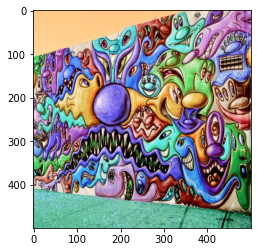

In [12]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading the image with opencv
img1 = cv2.imread("img2.jpeg")
img1 = cv2.resize(img1, (500,500))

plt.imshow(img1)

In [13]:
#Reading csv file with pandas and giving names to each column
indexes=["color","color_name","hex","R","G","B"]
color_csv = pd.read_csv('colors.csv', names=indexes, header=None)

In [15]:
color_csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [17]:
#declaring global variables (are used later on)
clicked = False
r = g = b = xpos = ypos = 0

#function to calculate minimum distance from all colors and get the most matching color
def get_Color_Name(R,G,B):
    min1 = 1000
    for i in range(len(color_csv)):
        ds = abs(R- int(color_csv.loc[i,"R"])) + abs(G- int(color_csv.loc[i,"G"]))+ abs(B- int(color_csv.loc[i,"B"]))
        if(ds<=min1):
            min1 = ds
            name = color_csv.loc[i,"color_name"]
    return name

#function to get x,y coordinates of mouse double click
def draw(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img1[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
       
    
cv2.namedWindow('color image')
cv2.setMouseCallback('color image',draw)

while(1):

    cv2.imshow("color image",img1)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img1,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text1 = get_Color_Name(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img1, text1,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img1, text1,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
    
cv2.destroyAllWindows()